# SSP Trajectory Encoding

Objective: Encode trajectories in SSPs using the method described in the Neural Computation Paper (Simulating and Predicting Dynamical Systems using SSPs, Voelker et al, 2021)

We will first generate arbitrary 1D trajectories and look at the similarity as the trajectory is smoothly varied.

## 1 D Trajectories

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ssp_bayes_opt import sspspace
from numpy.polynomial import legendre

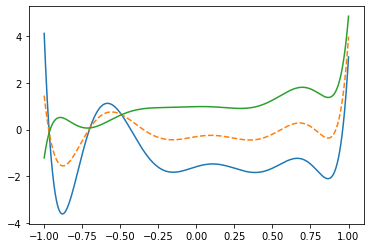

In [2]:
# Generate 2 Random 2D Trajectories
leg_dim = 10

ts = np.linspace(-1,1,1000)

c1 = np.random.normal(size=(leg_dim,))
c2 = np.random.random(size=(leg_dim,))

c3 = 0.5 * c1 + 0.5 * c2

vals1 = legendre.legval(ts, c1)
vals2 = legendre.legval(ts, c2)
vals3 = legendre.legval(ts, c3)

plt.plot(ts, vals1, label='C1')
plt.plot(ts, vals3, ls='--', label='(C1 + C2)/2')
plt.plot(ts, vals2, label='C2')

In [3]:
print(ts.shape, vals1.shape)

(1000,) (1000,)


In [11]:
# Constants:

ssp_dim = 101
len_scale_1d = 1

252038.15401648782
98
98 252376.02083678514
97 252263.91989954922
99 252038.15401648782
96 251701.93774106092
95 250691.953416189


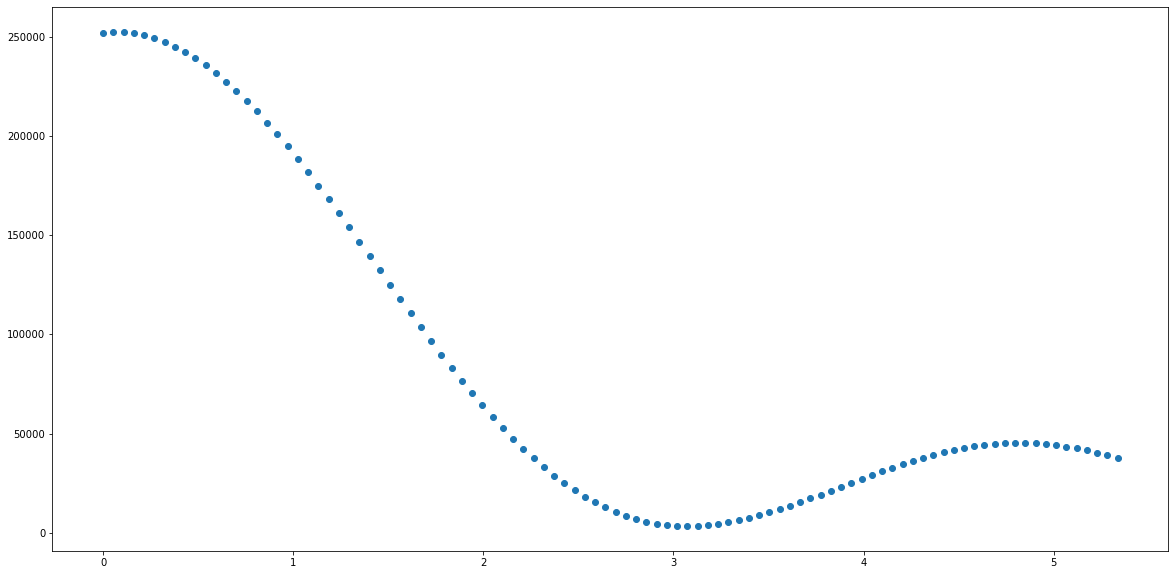

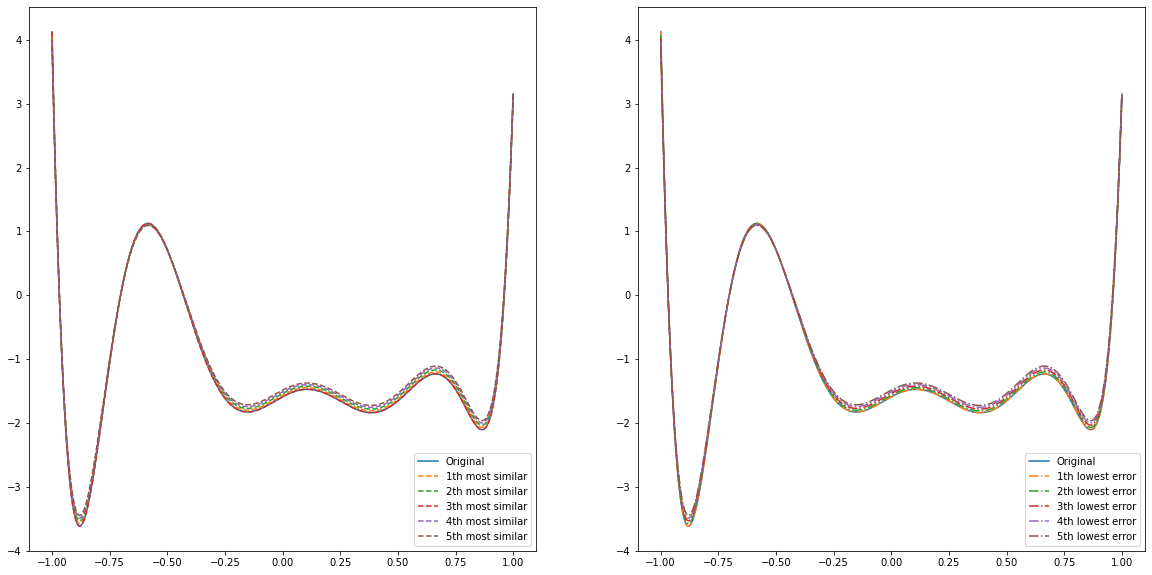

In [12]:
def make_trajectory(ts, coeffs):
    return np.vstack((ts, legendre.legval(ts, coeffs))).T

def encode_trajectory(traj, ssp_space):
    return np.sum(ssp_space.encode(traj), axis=0)

ssp_space = sspspace.RandomSSPSpace(domain_dim=2, 
                                    ssp_dim=ssp_dim, 
                                    domain_bounds=np.array([[-1,1],[-10,10]]), 
                                    length_scale=len_scale_1d)

traj1 = make_trajectory(ts, c1)
traj2 = make_trajectory(ts, c2)

ssp_traj1 = encode_trajectory(traj1, ssp_space)
print(np.inner(ssp_traj1, ssp_traj1))
sims = []
l1_errs = []
alphas = np.linspace(0,1,100)
trajectories = []
for alpha in alphas:
    traj_mid = make_trajectory(ts, alpha * c1 + (1-alpha) * c2)
    trajectories.append(traj_mid)
    ssp_traj_mid = encode_trajectory(traj_mid, ssp_space)
    sims.append(np.dot(ssp_traj1, ssp_traj_mid))
    
    l1_errs.append(np.max(np.abs(traj1[:,1] - traj_mid[:,1])))
    
    
max_traj = trajectories[np.argmax(sims)]
print(np.argmax(sims))
min_traj = trajectories[np.argmin(sims)]

worst_idxs = np.argsort(sims)
best_err_idxs = np.argsort(l1_errs)


  
plt.figure(figsize=(20,10))
plt.scatter(l1_errs, sims)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(traj1[:,0], traj1[:,1], label='Original')
for i in range(5):
    t = trajectories[worst_idxs[-(i+1)]]
    print(worst_idxs[-(i+1)], sims[worst_idxs[-(i+1)]])
    plt.plot(t[:,0], t[:,1], ls='--', label=f'{i+1}th most similar')
plt.legend()    

plt.subplot(1,2,2)
plt.plot(traj1[:,0], traj1[:,1], label='Original')
for i in range(5):
    t = trajectories[best_err_idxs[i]]
    plt.plot(t[:,0], t[:,1], ls='-.', label=f'{i+1}th lowest error')
plt.legend()
    

## 2D Trajectories

Considering Randomly generated 2D trajectories.

(1000, 3)


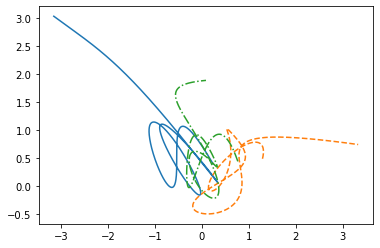

In [19]:

c1_2d = 2 * (np.random.random(size=(leg_dim,2)) - 0.5)
c2_2d = 2 * (np.random.random(size=(leg_dim,2)) - 0.5)

traj1_2d = make_trajectory(ts, c1_2d)
traj2_2d = make_trajectory(ts, c2_2d)
traj_mid_2d = make_trajectory(ts, 0.5 * c1_2d + 0.5 * c2_2d)
print(traj1_2d.shape)

plt.plot(traj1_2d[:,1], traj1_2d[:,2])
plt.plot(traj2_2d[:,1], traj2_2d[:,2], ls='--')
plt.plot(traj_mid_2d[:,1], traj_mid_2d[:,2], ls='-.')

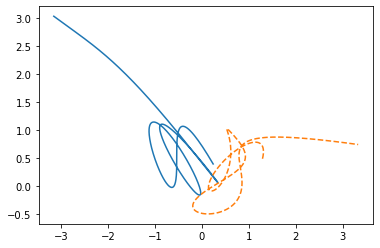

In [20]:
plt.plot(traj1_2d[:,1], traj1_2d[:,2])
plt.plot(traj2_2d[:,1], traj2_2d[:,2], ls='--')
#plt.plot(traj_mid_2d[:,1], traj_mid_2d[:,2], ls='-.')

22548.859314664962
99
99 22548.859314664962
98 22114.995872161508
97 21066.58351704712
96 19547.278324839193
95 17711.72086017211


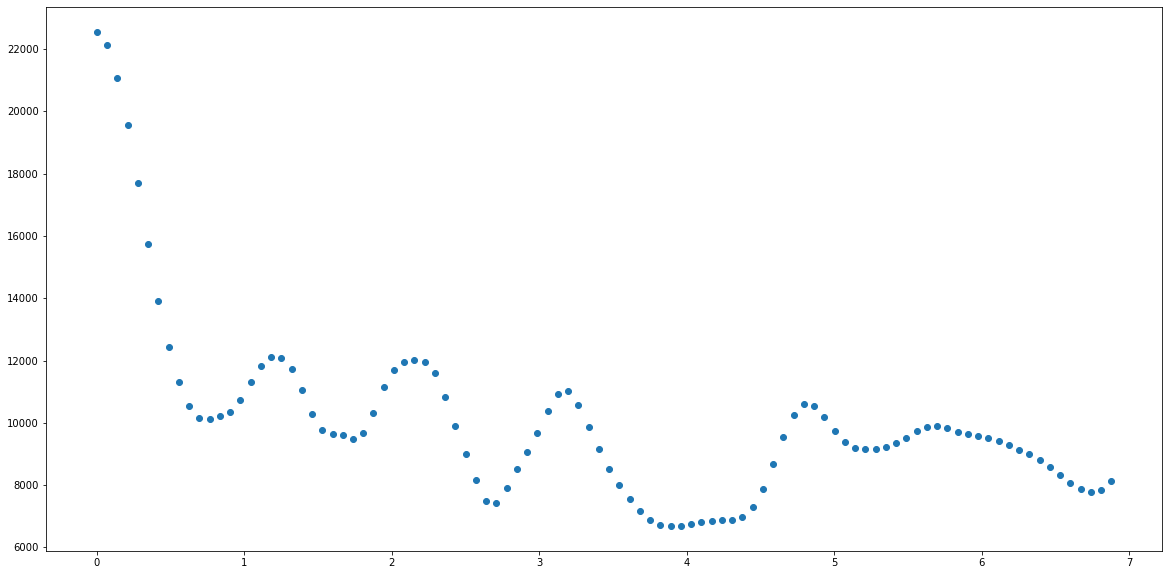

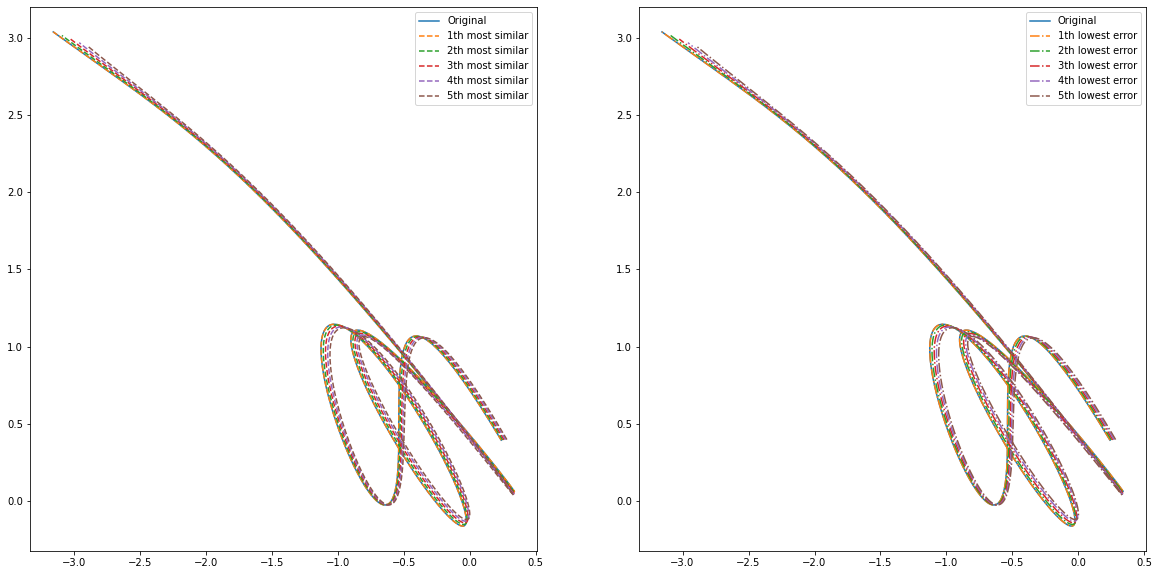

In [23]:
ssp_space = sspspace.RandomSSPSpace(domain_dim=3, 
                                    ssp_dim=ssp_dim, 
                                    domain_bounds=np.array([[-1,1],[-10,10], [-10,10]]), 
                                    length_scale=1e-1)

traj1_2d = make_trajectory(ts, c1_2d)
traj2_2d = make_trajectory(ts, c2_2d)

ssp_traj1_2d = encode_trajectory(traj1_2d, ssp_space)
print(np.inner(ssp_traj1_2d, ssp_traj1_2d))
sims = []
l2_errs = []
alphas = np.linspace(0,1,100)
trajectories = []
for alpha in alphas:
    traj_mid_2d = make_trajectory(ts, alpha * c1_2d + (1-alpha) * c2_2d)
    trajectories.append(traj_mid_2d)
    ssp_traj_mid_2d = encode_trajectory(traj_mid_2d, ssp_space)
    sims.append(np.dot(ssp_traj1_2d, ssp_traj_mid_2d))
    
    l2_errs.append(np.max(np.linalg.norm(traj1_2d - traj_mid_2d, axis=1)))
    
    
max_traj_2d = trajectories[np.argmax(sims)]
print(np.argmax(sims))
min_traj_2d = trajectories[np.argmin(sims)]

worst_idxs = np.argsort(sims)
best_err_idxs = np.argsort(l2_errs)


  
plt.figure(figsize=(20,10))
plt.scatter(l2_errs, sims)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(traj1_2d[:,1], traj1_2d[:,2], label='Original')
for i in range(5):
    t = trajectories[worst_idxs[-(i+1)]]
    print(worst_idxs[-(i+1)], sims[worst_idxs[-(i+1)]])
    plt.plot(t[:,1], t[:,2], ls='--', label=f'{i+1}th most similar')
plt.legend()    

plt.subplot(1,2,2)
plt.plot(traj1_2d[:,1], traj1_2d[:,2], label='Original')
for i in range(5):
    t = trajectories[best_err_idxs[i]]
    plt.plot(t[:,1], t[:,2], ls='-.', label=f'{i+1}th lowest error')
plt.legend()
    